<a href="https://colab.research.google.com/github/vaikunthd/Prediction-of-Agricultural-N2O-Emissions/blob/main/Prediction_of_Agricultural_N2O_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary and Data Overview**

The potent greenhouse gas nitrous oxide (N2O) is accumulating in the atmosphere at unprecedented rates largely due to agricultural intensification, and cultivated soils contribute ~60% of the agricultural flux. Empirical models of N2O fluxes for intensively managed cropping systems are confounded by highly variable fluxes and limited geographic coverage. Machine learning models provide good approximation ( 80 %  to 90%) accuracy in analysing the flux emission.

Dataset is from the Research paper, where they used sub-daily N2O flux data from six years of automated flux chambers installed in a continuous corn rotation at a site in the upper U.S. Midwest (3000 sub-daily flux observations), supplemented with weekly to biweekly manual chamber measurements (~1100 daily fluxes).

Dataset has 2246 records with 21 Columns including N2O Flux data. The data type of the variables are datetime64[ns] (1), float64 (10), int64 (4), object (6).

Research Paper and Dataset Link: https://datadryad.org/stash/dataset/doi:10.5061/dryad.bnzs7h493

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api

%matplotlib inline
plt.style.use('seaborn-darkgrid')

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_regression

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-fb1e78541dfe>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# **Importing Data**

SOM: Soil Organic Matter    
DAF: Days after fertilization   
Vegetation: Corn, GLYMX (Soyabean), TRIAE (Wheat)   
WFPS25CM: water filled pore space at field capacity   

In [ ]:
soil_data = pd.read_excel('/content/sample_data/Saha_et_al_2020_ERL_Data.xlsx', sheet_name=1)
soil_data

Date  Year Experiment   DataUse Replication     Month Vegetation  \
0    2012-02-09  2012   BCSE_KBS  Building          R1  February       Corn   
1    2012-02-10  2012   BCSE_KBS  Building          R1  February       Corn   
2    2012-02-18  2012   BCSE_KBS  Building          R1  February       Corn   
3    2012-02-19  2012   BCSE_KBS  Building          R1  February       Corn   
4    2012-03-16  2012   BCSE_KBS  Building          R1     March       Corn   
...         ...   ...        ...       ...         ...       ...        ...   
2241 2013-10-16  2013    MCSE-T2   Testing          R4   October      TRIAE   
2242 2013-11-15  2013    MCSE-T2   Testing          R1  November      TRIAE   
2243 2013-11-15  2013    MCSE-T2   Testing          R2  November      TRIAE   
2244 2013-11-15  2013    MCSE-T2   Testing          R3  November      TRIAE   
2245 2013-11-15  2013    MCSE-T2   Testing          R4  November      TRIAE   

     VegType       N2O  N_rate  ...   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm  \
0     Annual  3.896742     170  ...  0.00  -2.00     276     241  0.666508   
1     Annual  2.190218     170  ...  0.00  -2.40     277     242  0.640608   
2     Annual  3.542594     170  ...  8.64   0.30     285     250  0.728085   
3     Annual  3.342870     170  ...  8.13  -3.80     286     251  0.686872   
4     Annual  2.947778     170  ...  8.39  17.60     312     277  0.716221   
...      ...       ...     ...  ...   ...    ...     ...     ...       ...   
2241  Annual  1.640000      91  ...  8.13  10.81     167     167  0.390203   
2242  Annual  0.990000      91  ...  8.13   5.64     197     197  0.317040   
2243  Annual -0.200000      91  ...  8.13   5.64     197     197  0.341428   
2244  Annual  0.300000      91  ...  8.13   5.64     197     197  0.365815   
2245  Annual  0.400000      91  ...  8.13   5.64     197     197  0.341428   

            NH4        NO3        Clay        Sand       SOM  
0     11.046340  22.940812   62.500000  637.500000  1.174072  
1     11.008087  22.959578   62.500000  637.500000  1.174072  
2     10.831669  23.221928   62.500000  637.500000  1.174072  
3     10.849792  23.271978   62.500000  637.500000  1.174072  
4     10.204748  24.206855   62.500000  637.500000  1.174072  
...         ...        ...         ...         ...       ...  
2241  17.061793   5.803681  128.333333  491.666667  1.806000  
2242   5.624730   5.429873  162.500000  490.375000  1.496400  
2243   3.504328   7.239000  183.250000  432.875000  1.186800  
2244   3.636931   8.434294  169.833333  418.833333  1.823200  
2245   7.376583   6.645088  128.333333  491.666667  1.806000  

[2246 rows x 21 columns]

# **EDA**

look for the data size, distribution, null values and statistics to get an idea of attributes

In [ ]:
soil_data.shape

(2246, 21)

In [ ]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2246 non-null   datetime64[ns]
 1   Year         2246 non-null   int64         
 2   Experiment   2246 non-null   object        
 3   DataUse      2246 non-null   object        
 4   Replication  2246 non-null   object        
 5   Month        2246 non-null   object        
 6   Vegetation   2246 non-null   object        
 7   VegType      2246 non-null   object        
 8   N2O          2246 non-null   float64       
 9   N_rate       2246 non-null   int64         
 10  PP2          2246 non-null   float64       
 11  PP7          2246 non-null   float64       
 12  AirT         2246 non-null   float64       
 13  DAF_TD       2246 non-null   int64         
 14  DAF_SD       2246 non-null   int64         
 15  WFPS25cm     2194 non-null   float64       
 16  NH4   

In [ ]:
soil_data.describe()

Year          N2O       N_rate          PP2          PP7  \
count  2246.000000  2246.000000  2246.000000  2246.000000  2246.000000   
mean   2011.925200     7.468610   142.994212     5.219839    19.245273   
std       3.617418    28.488257    56.130412    10.064123    23.723416   
min    2002.000000    -7.415297     0.000000     0.000000     0.000000   
25%    2011.000000     0.504316   135.000000     0.000000     3.560000   
50%    2013.000000     1.972058   170.000000     0.510000    11.930000   
75%    2014.000000     5.187618   170.000000     6.000000    27.000000   
max    2017.000000   593.072000   213.000000    95.250000   260.090000   

              AirT       DAF_TD       DAF_SD     WFPS25cm          NH4  \
count  2246.000000  2246.000000  2246.000000  2194.000000  2170.000000   
mean     12.408699   195.321015   198.898041     0.531047    11.451364   
std       9.490152   144.915448   142.907436     0.171868    13.214895   
min     -20.700000     1.000000     0.000000     0.024388     1.383393   
25%       5.940000    73.250000    75.000000     0.390203     5.290323   
50%      14.490000   160.000000   172.000000     0.553853     9.081282   
75%      20.070000   308.750000   320.000000     0.680321    12.140325   
max      30.700000   718.000000   678.000000     0.912113   228.525000   

               NO3         Clay         Sand          SOM  
count  2216.000000  2246.000000  2246.000000  2246.000000  
mean     24.997063   134.425163   462.686739     1.901503  
std      24.941785    79.564891   219.451957     1.132896  
min       0.370070    62.500000    55.000000     1.174072  
25%      10.184722    62.500000   418.833333     1.174072  
50%      19.795863   128.333333   491.666667     1.186800  
75%      27.085459   183.250000   637.500000     1.823200  
max     238.920000   280.000000   637.500000     4.500000

In [ ]:
soil_data.isna().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

In [ ]:
soil_data.nunique()

Date           1287
Year             15
Experiment        3
DataUse           2
Replication       5
Month            12
Vegetation        3
VegType           1
N2O            1846
N_rate           16
PP2             224
PP7             470
AirT            601
DAF_TD          424
DAF_SD          415
WFPS25cm       1577
NH4            2138
NO3            2192
Clay             10
Sand              9
SOM              11
dtype: int64

# **Univariate Analysis**

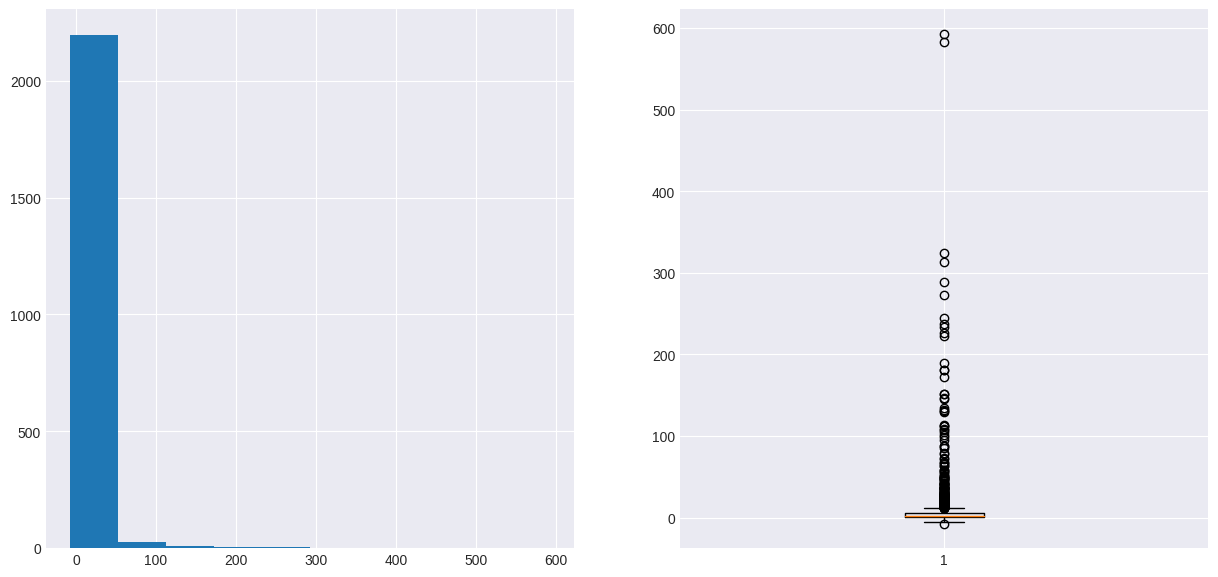

In [ ]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = soil_data["N2O"]
ax1.hist(x)
ax2.boxplot(x);

Checking Density plots for numerical attributes

In [ ]:
unpivot = pd.melt(soil_data, soil_data.describe().columns[1], soil_data.describe().columns[2:])

In [ ]:
unpivot

N2O variable     value
0      3.896742   N_rate  170.0000
1      2.190218   N_rate  170.0000
2      3.542594   N_rate  170.0000
3      3.342870   N_rate  170.0000
4      2.947778   N_rate  170.0000
...         ...      ...       ...
26947  1.640000      SOM    1.8060
26948  0.990000      SOM    1.4964
26949 -0.200000      SOM    1.1868
26950  0.300000      SOM    1.8232
26951  0.400000      SOM    1.8060

[26952 rows x 3 columns]

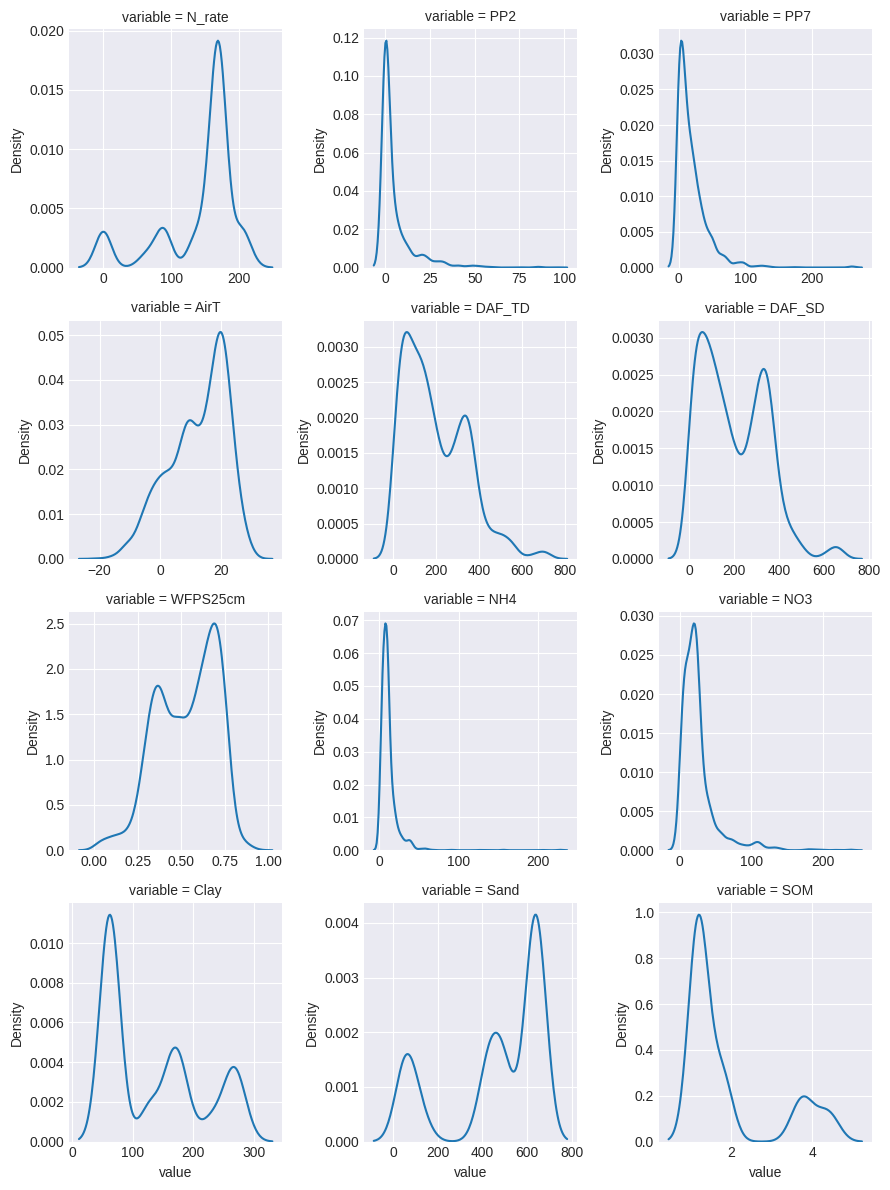

In [ ]:
unpivot = pd.melt(soil_data, soil_data.describe().columns[1], soil_data.describe().columns[2:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

In [ ]:
unpivot.variable

0        N_rate
1        N_rate
2        N_rate
3        N_rate
4        N_rate
          ...  
26947       SOM
26948       SOM
26949       SOM
26950       SOM
26951       SOM
Name: variable, Length: 26952, dtype: object

Checking boxplot for outlier analysis

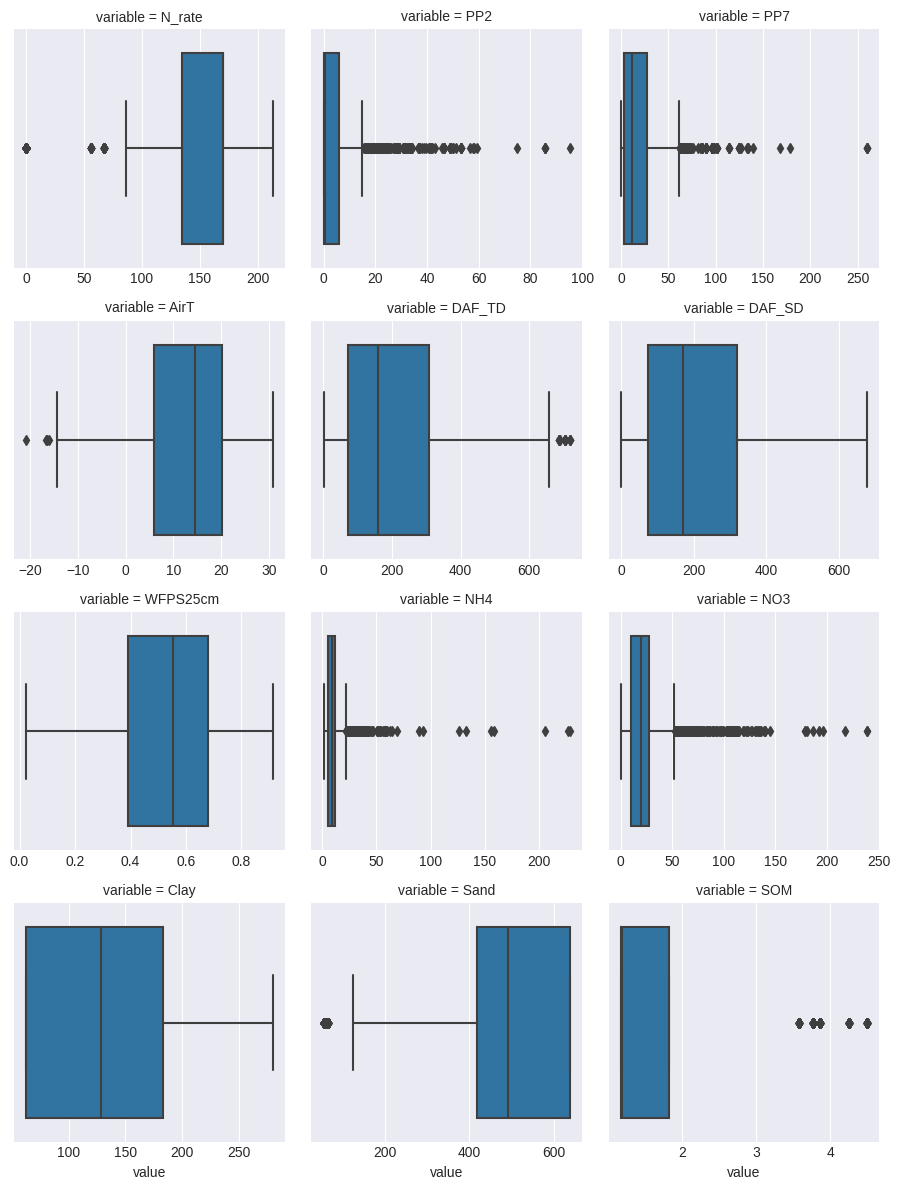

In [ ]:
unpivot = pd.melt(soil_data, soil_data.describe().columns[1], soil_data.describe().columns[2:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

# **Data Cleaning**

For WFPS, the mean value can be substituted within the quartile range

In [ ]:
soil_data["WFPS25cm"].fillna(soil_data["WFPS25cm"].mean(), inplace=True)
soil_data.fillna(soil_data.mean(), inplace=True)

# **Multivariate Analysis**

<Axes: >

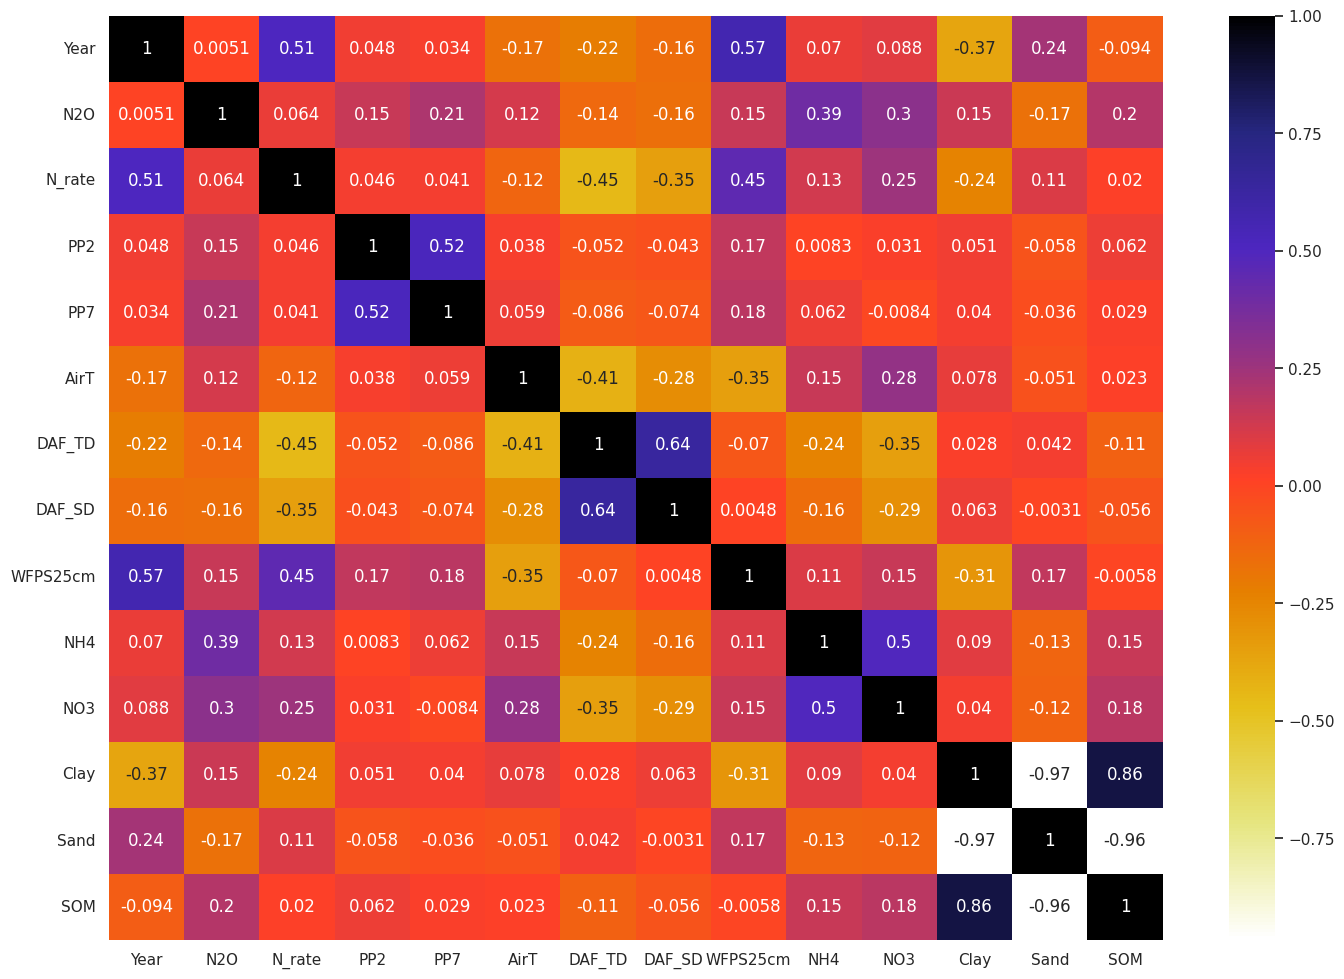

In [ ]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(soil_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

<hr>

**Sand** has high correlation with **SOM** and **Clay**, hence the data linearity will be affected if it is not dropped

The following pairplot shows distribution of Different Crops within the pair-plots of every two columns

<Figure size 1700x1200 with 0 Axes>

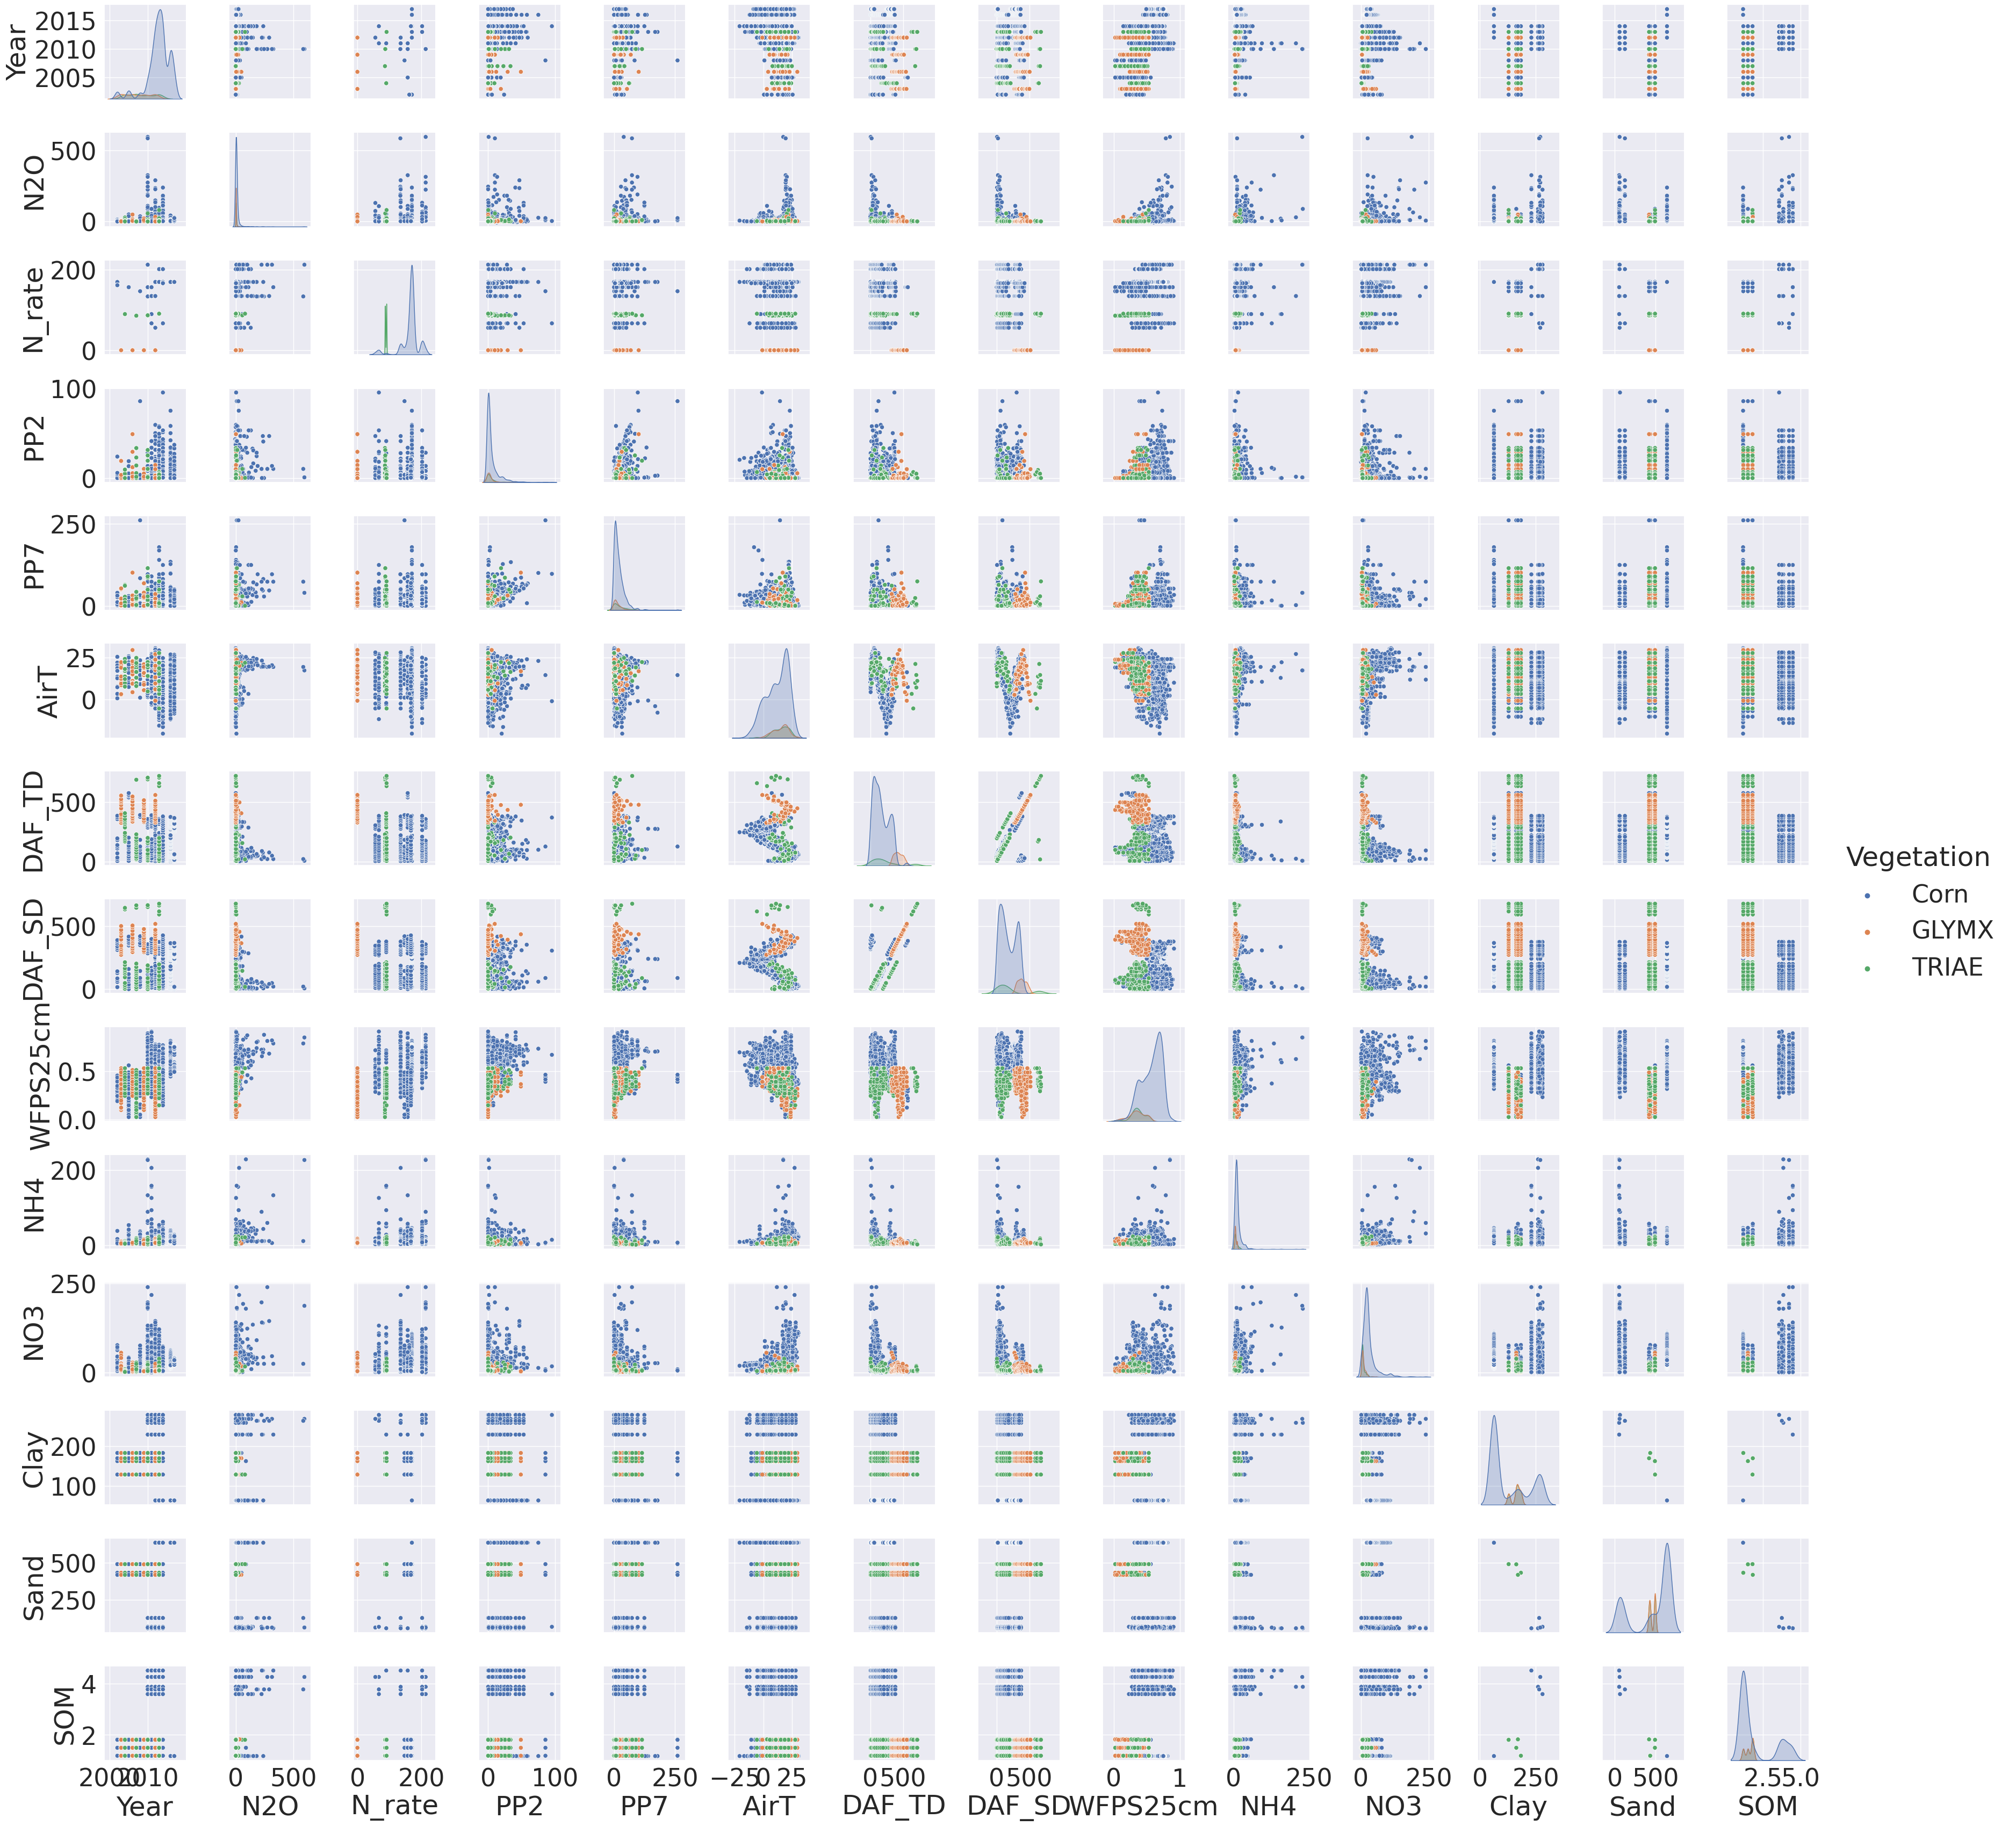

In [ ]:
plt.figure(figsize=(17,12))
sns.set(font_scale=3)
sns.pairplot(soil_data, hue="Vegetation", diag_kind='kde')

<hr>
We can perform time-range analysis of the target feature to get the idea of **varying flux** on *different phases of year/month*

In [ ]:
#pivot=soil_data.pivot("Month","N2O")
soil_data["Month"]

0       February
1       February
2       February
3       February
4          March
          ...   
2241     October
2242    November
2243    November
2244    November
2245    November
Name: Month, Length: 2246, dtype: object

<Axes: xlabel='Year', ylabel='N2O'>

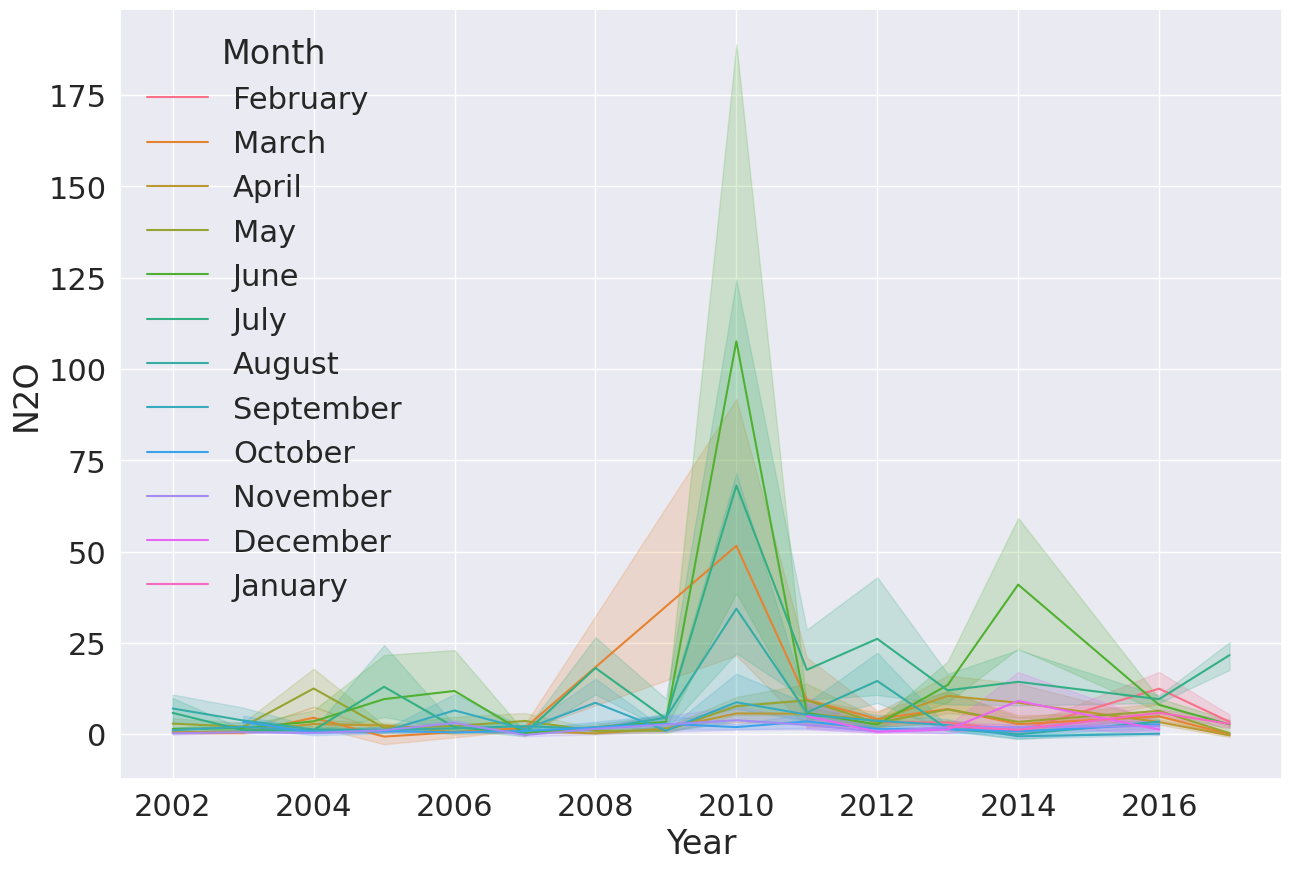

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.lineplot(x=soil_data["Year"], y=soil_data["N2O"],hue=soil_data["Month"])

<Axes: xlabel='Month', ylabel='N2O'>

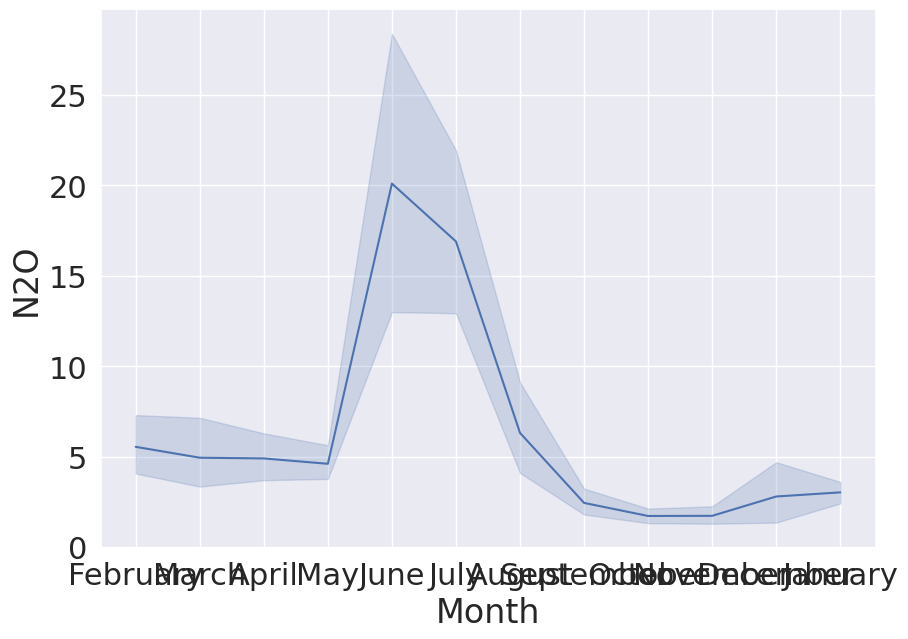

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
sns.lineplot(x=soil_data["Month"], y=soil_data["N2O"])

# **Encoding**

In [ ]:
months_dict = {'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

crops_dict = {"Corn": 1, "GLYMX": 2, "TRIAE": 3}
datause_dict = {"Building": 1, "Testing": 0}


In [ ]:
soil_data["Month"] = soil_data["Month"].apply(lambda x: months_dict[x])
soil_data["Vegetation"] = soil_data["Vegetation"].apply(lambda x: crops_dict[x])
soil_data["DataUse"] = soil_data["DataUse"].apply(lambda x: datause_dict[x])

This is the encoded and preprocessed dataset (stage 1). Herewith, there will be 2+ copies for processing and model testing

In [ ]:
soil_data.to_csv("soil_n2o_v0_encoded.csv", index=False)
soil_data

Date  Year Experiment  DataUse Replication  Month  Vegetation  \
0    2012-02-09  2012   BCSE_KBS        1          R1      2           1   
1    2012-02-10  2012   BCSE_KBS        1          R1      2           1   
2    2012-02-18  2012   BCSE_KBS        1          R1      2           1   
3    2012-02-19  2012   BCSE_KBS        1          R1      2           1   
4    2012-03-16  2012   BCSE_KBS        1          R1      3           1   
...         ...   ...        ...      ...         ...    ...         ...   
2241 2013-10-16  2013    MCSE-T2        0          R4     10           3   
2242 2013-11-15  2013    MCSE-T2        0          R1     11           3   
2243 2013-11-15  2013    MCSE-T2        0          R2     11           3   
2244 2013-11-15  2013    MCSE-T2        0          R3     11           3   
2245 2013-11-15  2013    MCSE-T2        0          R4     11           3   

     VegType       N2O  N_rate  ...   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm  \
0     Annual  3.896742     170  ...  0.00  -2.00     276     241  0.666508   
1     Annual  2.190218     170  ...  0.00  -2.40     277     242  0.640608   
2     Annual  3.542594     170  ...  8.64   0.30     285     250  0.728085   
3     Annual  3.342870     170  ...  8.13  -3.80     286     251  0.686872   
4     Annual  2.947778     170  ...  8.39  17.60     312     277  0.716221   
...      ...       ...     ...  ...   ...    ...     ...     ...       ...   
2241  Annual  1.640000      91  ...  8.13  10.81     167     167  0.390203   
2242  Annual  0.990000      91  ...  8.13   5.64     197     197  0.317040   
2243  Annual -0.200000      91  ...  8.13   5.64     197     197  0.341428   
2244  Annual  0.300000      91  ...  8.13   5.64     197     197  0.365815   
2245  Annual  0.400000      91  ...  8.13   5.64     197     197  0.341428   

            NH4        NO3        Clay        Sand       SOM  
0     11.046340  22.940812   62.500000  637.500000  1.174072  
1     11.008087  22.959578   62.500000  637.500000  1.174072  
2     10.831669  23.221928   62.500000  637.500000  1.174072  
3     10.849792  23.271978   62.500000  637.500000  1.174072  
4     10.204748  24.206855   62.500000  637.500000  1.174072  
...         ...        ...         ...         ...       ...  
2241  17.061793   5.803681  128.333333  491.666667  1.806000  
2242   5.624730   5.429873  162.500000  490.375000  1.496400  
2243   3.504328   7.239000  183.250000  432.875000  1.186800  
2244   3.636931   8.434294  169.833333  418.833333  1.823200  
2245   7.376583   6.645088  128.333333  491.666667  1.806000  

[2246 rows x 21 columns]

In [ ]:
soil_data_copy = soil_data.copy()
# soil_data_copy.drop(["Date"], axis=1, inplace=True)
replica_dict = {"R1": 1, "R2": 2, "R3": 3, "R4": 4, "R5": 5}
soil_data_copy["Replication"] = soil_data_copy["Replication"].apply(lambda x: replica_dict[x])
soil_data_copy

Date  Year Experiment  DataUse  Replication  Month  Vegetation  \
0    2012-02-09  2012   BCSE_KBS        1            1      2           1   
1    2012-02-10  2012   BCSE_KBS        1            1      2           1   
2    2012-02-18  2012   BCSE_KBS        1            1      2           1   
3    2012-02-19  2012   BCSE_KBS        1            1      2           1   
4    2012-03-16  2012   BCSE_KBS        1            1      3           1   
...         ...   ...        ...      ...          ...    ...         ...   
2241 2013-10-16  2013    MCSE-T2        0            4     10           3   
2242 2013-11-15  2013    MCSE-T2        0            1     11           3   
2243 2013-11-15  2013    MCSE-T2        0            2     11           3   
2244 2013-11-15  2013    MCSE-T2        0            3     11           3   
2245 2013-11-15  2013    MCSE-T2        0            4     11           3   

     VegType       N2O  N_rate  ...   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm  \
0     Annual  3.896742     170  ...  0.00  -2.00     276     241  0.666508   
1     Annual  2.190218     170  ...  0.00  -2.40     277     242  0.640608   
2     Annual  3.542594     170  ...  8.64   0.30     285     250  0.728085   
3     Annual  3.342870     170  ...  8.13  -3.80     286     251  0.686872   
4     Annual  2.947778     170  ...  8.39  17.60     312     277  0.716221   
...      ...       ...     ...  ...   ...    ...     ...     ...       ...   
2241  Annual  1.640000      91  ...  8.13  10.81     167     167  0.390203   
2242  Annual  0.990000      91  ...  8.13   5.64     197     197  0.317040   
2243  Annual -0.200000      91  ...  8.13   5.64     197     197  0.341428   
2244  Annual  0.300000      91  ...  8.13   5.64     197     197  0.365815   
2245  Annual  0.400000      91  ...  8.13   5.64     197     197  0.341428   

            NH4        NO3        Clay        Sand       SOM  
0     11.046340  22.940812   62.500000  637.500000  1.174072  
1     11.008087  22.959578   62.500000  637.500000  1.174072  
2     10.831669  23.221928   62.500000  637.500000  1.174072  
3     10.849792  23.271978   62.500000  637.500000  1.174072  
4     10.204748  24.206855   62.500000  637.500000  1.174072  
...         ...        ...         ...         ...       ...  
2241  17.061793   5.803681  128.333333  491.666667  1.806000  
2242   5.624730   5.429873  162.500000  490.375000  1.496400  
2243   3.504328   7.239000  183.250000  432.875000  1.186800  
2244   3.636931   8.434294  169.833333  418.833333  1.823200  
2245   7.376583   6.645088  128.333333  491.666667  1.806000  

[2246 rows x 21 columns]

In [ ]:
soil_data

Date  Year Experiment  DataUse Replication  Month  Vegetation  \
0    2012-02-09  2012   BCSE_KBS        1          R1      2           1   
1    2012-02-10  2012   BCSE_KBS        1          R1      2           1   
2    2012-02-18  2012   BCSE_KBS        1          R1      2           1   
3    2012-02-19  2012   BCSE_KBS        1          R1      2           1   
4    2012-03-16  2012   BCSE_KBS        1          R1      3           1   
...         ...   ...        ...      ...         ...    ...         ...   
2241 2013-10-16  2013    MCSE-T2        0          R4     10           3   
2242 2013-11-15  2013    MCSE-T2        0          R1     11           3   
2243 2013-11-15  2013    MCSE-T2        0          R2     11           3   
2244 2013-11-15  2013    MCSE-T2        0          R3     11           3   
2245 2013-11-15  2013    MCSE-T2        0          R4     11           3   

     VegType       N2O  N_rate  ...   PP7   AirT  DAF_TD  DAF_SD  WFPS25cm  \
0     Annual  3.896742     170  ...  0.00  -2.00     276     241  0.666508   
1     Annual  2.190218     170  ...  0.00  -2.40     277     242  0.640608   
2     Annual  3.542594     170  ...  8.64   0.30     285     250  0.728085   
3     Annual  3.342870     170  ...  8.13  -3.80     286     251  0.686872   
4     Annual  2.947778     170  ...  8.39  17.60     312     277  0.716221   
...      ...       ...     ...  ...   ...    ...     ...     ...       ...   
2241  Annual  1.640000      91  ...  8.13  10.81     167     167  0.390203   
2242  Annual  0.990000      91  ...  8.13   5.64     197     197  0.317040   
2243  Annual -0.200000      91  ...  8.13   5.64     197     197  0.341428   
2244  Annual  0.300000      91  ...  8.13   5.64     197     197  0.365815   
2245  Annual  0.400000      91  ...  8.13   5.64     197     197  0.341428   

            NH4        NO3        Clay        Sand       SOM  
0     11.046340  22.940812   62.500000  637.500000  1.174072  
1     11.008087  22.959578   62.500000  637.500000  1.174072  
2     10.831669  23.221928   62.500000  637.500000  1.174072  
3     10.849792  23.271978   62.500000  637.500000  1.174072  
4     10.204748  24.206855   62.500000  637.500000  1.174072  
...         ...        ...         ...         ...       ...  
2241  17.061793   5.803681  128.333333  491.666667  1.806000  
2242   5.624730   5.429873  162.500000  490.375000  1.496400  
2243   3.504328   7.239000  183.250000  432.875000  1.186800  
2244   3.636931   8.434294  169.833333  418.833333  1.823200  
2245   7.376583   6.645088  128.333333  491.666667  1.806000  

[2246 rows x 21 columns]

# **Scaling**

scaling the numerical features below, and then performing baseline modeling

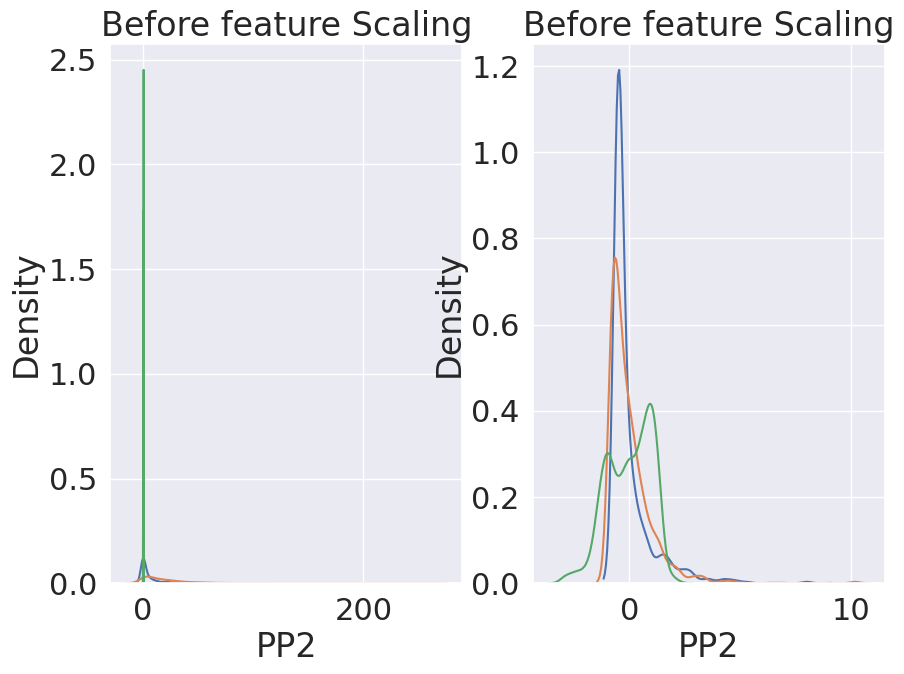

In [ ]:
X_sample = soil_data_copy[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y_sample = soil_data_copy.drop(["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"], axis=1)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
ax1.set_title('Before feature Scaling')
sns.kdeplot(X_sample["PP2"], ax=ax1)
sns.kdeplot(X_sample["PP7"], ax=ax1)
sns.kdeplot(X_sample["WFPS25cm"], ax=ax1)


sc = StandardScaler()
X_sample_scaled = pd.DataFrame(sc.fit_transform(X_sample), columns=X_sample.columns)

ax2.set_title('Before feature Scaling')
sns.kdeplot(X_sample_scaled["PP2"], ax=ax2)
sns.kdeplot(X_sample_scaled["PP7"], ax=ax2)
sns.kdeplot(X_sample_scaled["WFPS25cm"], ax=ax2)
plt.show()

In [ ]:
scaled_data = pd.concat([X_sample_scaled, y_sample], axis=1)
soil_grp_sc = scaled_data.groupby("Date").mean()

soil_grp_sc

N_rate       PP2       PP7      AirT    DAF_TD    DAF_SD  \
Date                                                                     
2002-03-27  0.481233 -0.518774 -0.811416 -1.249858  1.109024  0.791611   
2002-04-10  0.481233  1.854142  0.275558 -0.499439  1.205654  0.889599   
2002-04-24  0.481233 -0.417798 -0.549578  0.059159  1.302284  0.987586   
2002-05-15  0.374315 -0.518774  0.858669  0.121342 -1.313617  1.134567   
2002-05-30  0.338676 -0.518774 -0.662024  1.010883 -1.210085  1.239553   
...              ...       ...       ...       ...       ...       ...   
2017-07-05  0.481233 -0.518774  0.242630  1.053042 -0.954707 -1.287120   
2017-07-06  0.481233 -0.518774  0.242630  1.168977 -0.947805 -1.280121   
2017-07-07  0.481233  0.375691 -0.347636  1.147898 -0.940903 -1.273122   
2017-07-08  0.481233  0.375691  0.031821  0.779013 -0.934001 -1.266123   
2017-07-09  0.481233  0.375691  0.031821  0.800092 -0.927099 -1.259123   

            WFPS25cm       NH4       NO3      Clay       SOM    Year  DataUse  \
Date                                                                            
2002-03-27 -0.947729 -0.469799 -0.883465  0.333815 -0.285530  2002.0      0.0   
2002-04-10 -0.677234 -0.390684 -0.839041  0.333815 -0.285530  2002.0      0.0   
2002-04-24 -1.157614 -0.347390 -0.840750  0.333815 -0.285530  2002.0      0.0   
2002-05-15 -1.052846 -0.231768 -0.641797  0.333815 -0.285530  2002.0      0.0   
2002-05-30 -1.526328 -0.132096 -0.123178  0.333815 -0.285530  2002.0      0.0   
...              ...       ...       ...       ...       ...     ...      ...   
2017-07-05 -0.037166  0.844516  0.372217 -0.904182 -0.642242  2017.0      1.0   
2017-07-06 -0.112985  0.642479  0.319283 -0.904182 -0.642242  2017.0      1.0   
2017-07-07 -0.162544  0.833101  0.345214 -0.904182 -0.642242  2017.0      1.0   
2017-07-08 -0.180028  0.928324  0.369233 -0.904182 -0.642242  2017.0      1.0   
2017-07-09 -0.223608  0.987867  0.417460 -0.904182 -0.642242  2017.0      1.0   

            Replication  Month  Vegetation        N2O      Sand  
Date                                                             
2002-03-27          2.5    3.0         1.0   0.307500  458.4375  
2002-04-10          2.5    4.0         1.0   0.630000  458.4375  
2002-04-24          2.5    4.0         1.0   0.610000  458.4375  
2002-05-15          2.5    5.0         1.0   3.935000  458.4375  
2002-05-30          2.5    5.0         1.0   1.760000  458.4375  
...                 ...    ...         ...        ...       ...  
2017-07-05          1.0    7.0         1.0  21.102827  637.5000  
2017-07-06          1.0    7.0         1.0  22.966965  637.5000  
2017-07-07          1.0    7.0         1.0  27.918279  637.5000  
2017-07-08          1.0    7.0         1.0  25.631418  637.5000  
2017-07-09          1.0    7.0         1.0  22.892078  637.5000  

[1287 rows x 18 columns]

In [ ]:
X_sample = soil_grp_sc.drop("N2O", axis=1)
y_sample = soil_grp_sc["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.33, random_state=101)

#modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
import statsmodels.api as sm
forward_selection(X_sample, y_sample)

['NH4', 'PP7', 'PP2', 'SOM', 'DAF_SD', 'DAF_TD']

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
!pip install --upgrade --no-deps statsmodels
import statsmodels.api as sm

In [ ]:
backward_elimination(X_sample, y_sample)

['PP2',
 'PP7',
 'AirT',
 'DAF_TD',
 'DAF_SD',
 'WFPS25cm',
 'NH4',
 'Year',
 'Month',
 'Sand']

# **Without Scaling**

In [ ]:
soil_group = soil_data.groupby("Date").mean()
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2  \
Date                                                                        
2002-03-27  2002.0      0.0    3.0         1.0   0.307500   170.0   0.000   
2002-04-10  2002.0      0.0    4.0         1.0   0.630000   170.0  23.876   
2002-04-24  2002.0      0.0    4.0         1.0   0.610000   170.0   1.016   
2002-05-15  2002.0      0.0    5.0         1.0   3.935000   164.0   0.000   
2002-05-30  2002.0      0.0    5.0         1.0   1.760000   162.0   0.000   
...            ...      ...    ...         ...        ...     ...     ...   
2017-07-05  2017.0      1.0    7.0         1.0  21.102827   170.0   0.000   
2017-07-06  2017.0      1.0    7.0         1.0  22.966965   170.0   0.000   
2017-07-07  2017.0      1.0    7.0         1.0  27.918279   170.0   9.000   
2017-07-08  2017.0      1.0    7.0         1.0  25.631418   170.0   9.000   
2017-07-09  2017.0      1.0    7.0         1.0  22.892078   170.0   9.000   

                PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
Date                                                                         
2002-03-27   0.0000   0.55   356.0   312.0  0.370097   5.350371   3.114477   
2002-04-10  25.7810   7.67   370.0   326.0  0.416034   6.377781   4.214812   
2002-04-24   6.2103  12.97   384.0   340.0  0.334452   6.940021   4.172479   
2002-05-15  39.6113  13.56     5.0   361.0  0.352245   8.441531   9.100344   
2002-05-30   3.5433  22.00    20.0   376.0  0.271834   9.735911  21.946054   
...             ...    ...     ...     ...       ...        ...        ...   
2017-07-05  25.0000  22.40    57.0    15.0  0.524735  22.418589  34.216524   
2017-07-06  25.0000  23.50    58.0    16.0  0.511859  19.794852  32.905413   
2017-07-07  11.0000  23.30    59.0    17.0  0.503443  22.270345  33.547679   
2017-07-08  20.0000  19.80    60.0    18.0  0.500473  23.506947  34.142608   
2017-07-09  20.0000  20.00    61.0    19.0  0.493072  24.280197  35.337144   

                  Clay      Sand       SOM  
Date                                        
2002-03-27  160.979167  458.4375  1.578100  
2002-04-10  160.979167  458.4375  1.578100  
2002-04-24  160.979167  458.4375  1.578100  
2002-05-15  160.979167  458.4375  1.578100  
2002-05-30  160.979167  458.4375  1.578100  
...                ...       ...       ...  
2017-07-05   62.500000  637.5000  1.174072  
2017-07-06   62.500000  637.5000  1.174072  
2017-07-07   62.500000  637.5000  1.174072  
2017-07-08   62.500000  637.5000  1.174072  
2017-07-09   62.500000  637.5000  1.174072  

[1287 rows x 17 columns]

In [ ]:
soil_group.DataUse.value_counts()

1.000000    1115
0.000000     136
0.200000      32
0.555556       3
0.250000       1
Name: DataUse, dtype: int64

In [ ]:
soil_group["DataUse"].apply(lambda x: round(x))

Date
2002-03-27    0
2002-04-10    0
2002-04-24    0
2002-05-15    0
2002-05-30    0
             ..
2017-07-05    1
2017-07-06    1
2017-07-07    1
2017-07-08    1
2017-07-09    1
Name: DataUse, Length: 1287, dtype: int64

In [ ]:
soil_group.Vegetation.value_counts()

1.000000    1183
2.000000      43
3.000000      39
2.600000      10
1.800000       9
1.888889       1
1.444444       1
2.500000       1
Name: Vegetation, dtype: int64

In [ ]:
soil_group["Vegetation"] = soil_group["Vegetation"].apply(lambda x: round(x))

In [ ]:
soil_group["Vegetation"].value_counts()

1    1184
2      54
3      49
Name: Vegetation, dtype: int64

Vegetation count for each crop before flux mean:

In [ ]:
soil_data.groupby("Vegetation").count()

Date  Year  Experiment  DataUse  Replication  Month  VegType  \
Vegetation                                                                 
1           1845  1845        1845     1845         1845   1845     1845   
2            204   204         204      204          204    204      204   
3            197   197         197      197          197    197      197   

             N2O  N_rate   PP2   PP7  AirT  DAF_TD  DAF_SD  WFPS25cm   NH4  \
Vegetation                                                                   
1           1845    1845  1845  1845  1845    1845    1845      1845  1845   
2            204     204   204   204   204     204     204       204   204   
3            197     197   197   197   197     197     197       197   197   

             NO3  Clay  Sand   SOM  
Vegetation                          
1           1845  1845  1845  1845  
2            204   204   204   204  
3            197   197   197   197

In [ ]:
soil_group[["Year", "DataUse", "Month"]] = soil_group[["Year", "DataUse", "Month"]].astype(int)

Vegetation count for each crop after flux mean:

In [ ]:
soil_group.groupby("Vegetation").count()

Year  DataUse  Month   N2O  N_rate   PP2   PP7  AirT  DAF_TD  \
Vegetation                                                                 
1           1184     1184   1184  1184    1184  1184  1184  1184    1184   
2             54       54     54    54      54    54    54    54      54   
3             49       49     49    49      49    49    49    49      49   

            DAF_SD  WFPS25cm   NH4   NO3  Clay  Sand   SOM  
Vegetation                                                  
1             1184      1184  1184  1184  1184  1184  1184  
2               54        54    54    54    54    54    54  
3               49        49    49    49    49    49    49

In [ ]:
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2  \
Date                                                                      
2002-03-27  2002        0      3           1   0.307500   170.0   0.000   
2002-04-10  2002        0      4           1   0.630000   170.0  23.876   
2002-04-24  2002        0      4           1   0.610000   170.0   1.016   
2002-05-15  2002        0      5           1   3.935000   164.0   0.000   
2002-05-30  2002        0      5           1   1.760000   162.0   0.000   
...          ...      ...    ...         ...        ...     ...     ...   
2017-07-05  2017        1      7           1  21.102827   170.0   0.000   
2017-07-06  2017        1      7           1  22.966965   170.0   0.000   
2017-07-07  2017        1      7           1  27.918279   170.0   9.000   
2017-07-08  2017        1      7           1  25.631418   170.0   9.000   
2017-07-09  2017        1      7           1  22.892078   170.0   9.000   

                PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3  \
Date                                                                         
2002-03-27   0.0000   0.55   356.0   312.0  0.370097   5.350371   3.114477   
2002-04-10  25.7810   7.67   370.0   326.0  0.416034   6.377781   4.214812   
2002-04-24   6.2103  12.97   384.0   340.0  0.334452   6.940021   4.172479   
2002-05-15  39.6113  13.56     5.0   361.0  0.352245   8.441531   9.100344   
2002-05-30   3.5433  22.00    20.0   376.0  0.271834   9.735911  21.946054   
...             ...    ...     ...     ...       ...        ...        ...   
2017-07-05  25.0000  22.40    57.0    15.0  0.524735  22.418589  34.216524   
2017-07-06  25.0000  23.50    58.0    16.0  0.511859  19.794852  32.905413   
2017-07-07  11.0000  23.30    59.0    17.0  0.503443  22.270345  33.547679   
2017-07-08  20.0000  19.80    60.0    18.0  0.500473  23.506947  34.142608   
2017-07-09  20.0000  20.00    61.0    19.0  0.493072  24.280197  35.337144   

                  Clay      Sand       SOM  
Date                                        
2002-03-27  160.979167  458.4375  1.578100  
2002-04-10  160.979167  458.4375  1.578100  
2002-04-24  160.979167  458.4375  1.578100  
2002-05-15  160.979167  458.4375  1.578100  
2002-05-30  160.979167  458.4375  1.578100  
...                ...       ...       ...  
2017-07-05   62.500000  637.5000  1.174072  
2017-07-06   62.500000  637.5000  1.174072  
2017-07-07   62.500000  637.5000  1.174072  
2017-07-08   62.500000  637.5000  1.174072  
2017-07-09   62.500000  637.5000  1.174072  

[1287 rows x 17 columns]

In [ ]:
soil_group.reset_index(drop=True, inplace=True)

In [ ]:
soil_group.to_csv("soil_n20_data_preprocessed_reduced.csv", index=False)
soil_group

Year  DataUse  Month  Vegetation        N2O  N_rate     PP2      PP7  \
0     2002        0      3           1   0.307500   170.0   0.000   0.0000   
1     2002        0      4           1   0.630000   170.0  23.876  25.7810   
2     2002        0      4           1   0.610000   170.0   1.016   6.2103   
3     2002        0      5           1   3.935000   164.0   0.000  39.6113   
4     2002        0      5           1   1.760000   162.0   0.000   3.5433   
...    ...      ...    ...         ...        ...     ...     ...      ...   
1282  2017        1      7           1  21.102827   170.0   0.000  25.0000   
1283  2017        1      7           1  22.966965   170.0   0.000  25.0000   
1284  2017        1      7           1  27.918279   170.0   9.000  11.0000   
1285  2017        1      7           1  25.631418   170.0   9.000  20.0000   
1286  2017        1      7           1  22.892078   170.0   9.000  20.0000   

       AirT  DAF_TD  DAF_SD  WFPS25cm        NH4        NO3        Clay  \
0      0.55   356.0   312.0  0.370097   5.350371   3.114477  160.979167   
1      7.67   370.0   326.0  0.416034   6.377781   4.214812  160.979167   
2     12.97   384.0   340.0  0.334452   6.940021   4.172479  160.979167   
3     13.56     5.0   361.0  0.352245   8.441531   9.100344  160.979167   
4     22.00    20.0   376.0  0.271834   9.735911  21.946054  160.979167   
...     ...     ...     ...       ...        ...        ...         ...   
1282  22.40    57.0    15.0  0.524735  22.418589  34.216524   62.500000   
1283  23.50    58.0    16.0  0.511859  19.794852  32.905413   62.500000   
1284  23.30    59.0    17.0  0.503443  22.270345  33.547679   62.500000   
1285  19.80    60.0    18.0  0.500473  23.506947  34.142608   62.500000   
1286  20.00    61.0    19.0  0.493072  24.280197  35.337144   62.500000   

          Sand       SOM  
0     458.4375  1.578100  
1     458.4375  1.578100  
2     458.4375  1.578100  
3     458.4375  1.578100  
4     458.4375  1.578100  
...        ...       ...  
1282  637.5000  1.174072  
1283  637.5000  1.174072  
1284  637.5000  1.174072  
1285  637.5000  1.174072  
1286  637.5000  1.174072  

[1287 rows x 17 columns]

# **Decision Tree**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((862, 11), (425, 11))

In [ ]:
X_train

N_rate    PP2     PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
1275   170.0   0.00   8.000  18.10    50.0     8.0  0.536841  28.162598   
489    170.0   0.00   7.620  15.30    31.0   360.0  0.654177  13.037974   
311    170.0   1.78   1.780  17.40   149.0   115.0  0.442020   7.365871   
497    170.0  12.70  30.480  17.60    40.0     3.0  0.664900  24.329923   
1091   170.0  21.00  98.000  19.00   104.0    65.0  0.723123   2.625551   
...      ...    ...     ...    ...     ...     ...       ...        ...   
369    170.0   0.00   7.360   3.80   221.0   187.0  0.686183   8.816816   
1126   170.0   0.00  41.000  16.50   148.0   109.0  0.728895   8.867709   
57       0.0   0.00  12.065  17.35   397.0   357.0  0.341428   5.411571   
1138   170.0  13.00  18.000  17.70   160.0   121.0  0.746895  10.153423   
354    170.0   0.00   1.270   3.70   206.0   172.0  0.652558   9.056897   

            NO3        Clay       SOM  
1275  41.054100   62.500000  1.174072  
489   36.861673   62.500000  1.174072  
311   21.864431   62.500000  1.174072  
497   40.406504   62.500000  1.174072  
1091  12.831044   62.500000  1.174072  
...         ...         ...       ...  
369   25.441489   62.500000  1.174072  
1126  17.008660   62.500000  1.174072  
57    15.054912  160.979167  1.578100  
1138  17.909631   62.500000  1.174072  
354   24.615465   62.500000  1.174072  

[862 rows x 11 columns]

In [ ]:
# Building Decision Tree
dt = DecisionTreeRegressor(criterion= 'squared_error', random_state=101, max_depth=3)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_test)

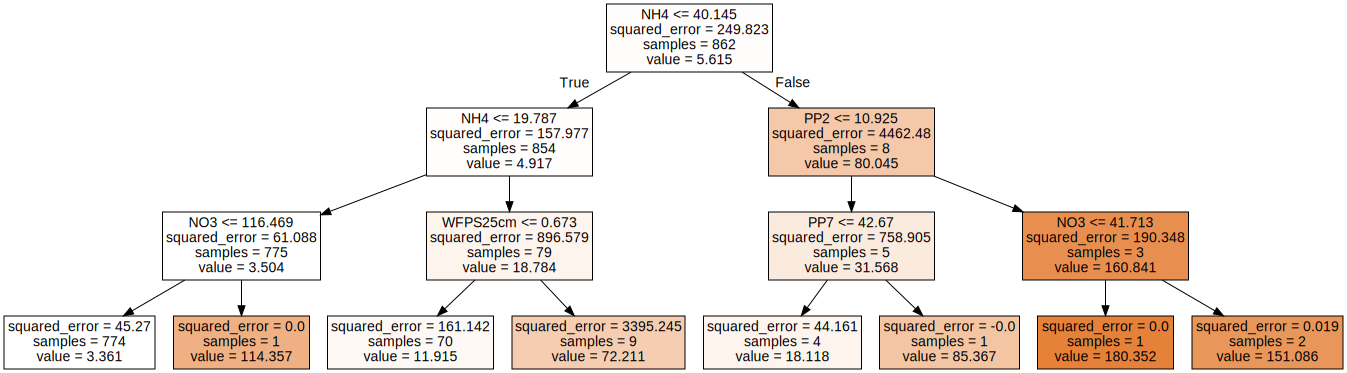

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

In [ ]:
print('r2 score:', r2_score(y_test, dt_pred_train))
print('MAE:', mean_absolute_error(y_test, dt_pred_train))
print('MSE:', mean_squared_error(y_test, dt_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred_train)))

r2 score: 0.4579982779445402
MAE: 5.184750691318081
MSE: 291.6750699297066
RMSE: 17.078497297177716


# **Random Forest**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 101)
X_train.shape, X_test.shape

((862, 11), (425, 11))

In [ ]:
rfr = RandomForestRegressor(n_estimators = 500, random_state = 101)
rfr.fit(X_train, y_train)
prediction = rfr.predict(X_test)

In [ ]:
print('r2 score:', r2_score(y_test, prediction))
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

r2 score: 0.5637546441536243
MAE: 4.879578165392646
MSE: 238.36556853138012
RMSE: 15.439092218501065


# **Linear Regression**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
lin_reg = LinearRegression()
model=lin_reg.fit(X_train, y_train)
lin_reg_y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, lin_reg_y_pred)
print(mse)

318.19621460011336


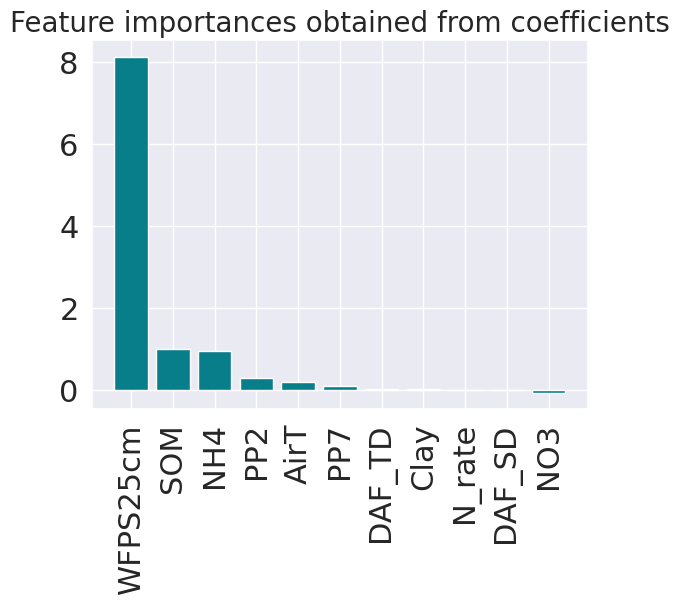

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
importances

Attribute  Importance
6   WFPS25cm    8.130621
10       SOM    0.985724
7        NH4    0.941960
1        PP2    0.280787
3       AirT    0.175157
2        PP7    0.079422
4     DAF_TD    0.015017
9       Clay    0.010277
0     N_rate   -0.005084
5     DAF_SD   -0.019805
8        NO3   -0.072147

In [ ]:
print('r2 score:', r2_score(y_test, lin_reg_y_pred))
print('MAE:', mean_absolute_error(y_test, lin_reg_y_pred))
print('MSE:', mean_squared_error(y_test, lin_reg_y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))

r2 score: 0.41765238275627026
MAE: 7.0699821856982155
MSE: 318.19621460011336
RMSE: 17.838055235930664


# **Lasso Regression**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
X_test

N_rate    PP2    PP7   AirT  DAF_TD  DAF_SD  WFPS25cm        NH4  \
1096   170.0   2.00  24.00  21.40   109.0    70.0  0.707982   2.319528   
1041   170.0   0.00   3.00  17.30    51.0    12.0  0.582787  38.493257   
353    170.0   0.00   2.54   2.90   205.0   171.0  0.652558   9.088210   
410    170.0   9.39  10.66   9.60   266.0   232.0  0.722617   8.825316   
20       0.0   0.00   0.00  20.91   446.0   394.0  0.113809   5.300266   
...      ...    ...    ...    ...     ...     ...       ...        ...   
331    119.2   0.00  13.72   1.06   180.0   146.0  0.496703   9.046482   
1130   170.0   0.00  21.00  10.00   152.0   113.0  0.726550   9.457736   
948    170.0   0.00   5.00  15.80   313.0   266.0  0.741188  10.196261   
1199   170.0  16.00  17.00  -1.90   275.0   236.0  0.764297  11.134084   
893    170.0   0.00  29.00  -0.80   247.0   200.0  0.660072  10.541632   

            NO3        Clay       SOM  
1096  12.629080   62.500000  1.174072  
1041  61.542204   62.500000  1.174072  
353   24.545286   62.500000  1.174072  
410   26.826485   62.500000  1.174072  
20    15.918656  160.979167  1.578100  
...         ...         ...       ...  
331    5.434748  261.000000  3.993333  
1130  17.284905   62.500000  1.174072  
948   23.901550   62.500000  1.174072  
1199  21.851828   62.500000  1.174072  
893   22.966740   62.500000  1.174072  

[425 rows x 11 columns]

In [ ]:
## training the model

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)

322.23405586487155


In [ ]:
print('r2 score:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

r2 score: 0.41026251722221474
MAE: 6.873767719502678
MSE: 322.23405586487155
RMSE: 17.950878971929804


# **Ridge Regression**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
## training the model

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(mse)

318.44358603834024


In [ ]:
print('r2 score:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

r2 score: 0.4171996552849312
MAE: 7.048277379398248
MSE: 318.44358603834024
RMSE: 17.844987700705772


# **XGBoost**

In [ ]:
X = soil_group[["N_rate","PP2","PP7","AirT","DAF_TD","DAF_SD","WFPS25cm","NH4","NO3","Clay","SOM"]]
y = soil_group["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 101)
X_train.shape, X_test.shape

((862, 11), (425, 11))

r2 score for base model: 0.448601


<Axes: >

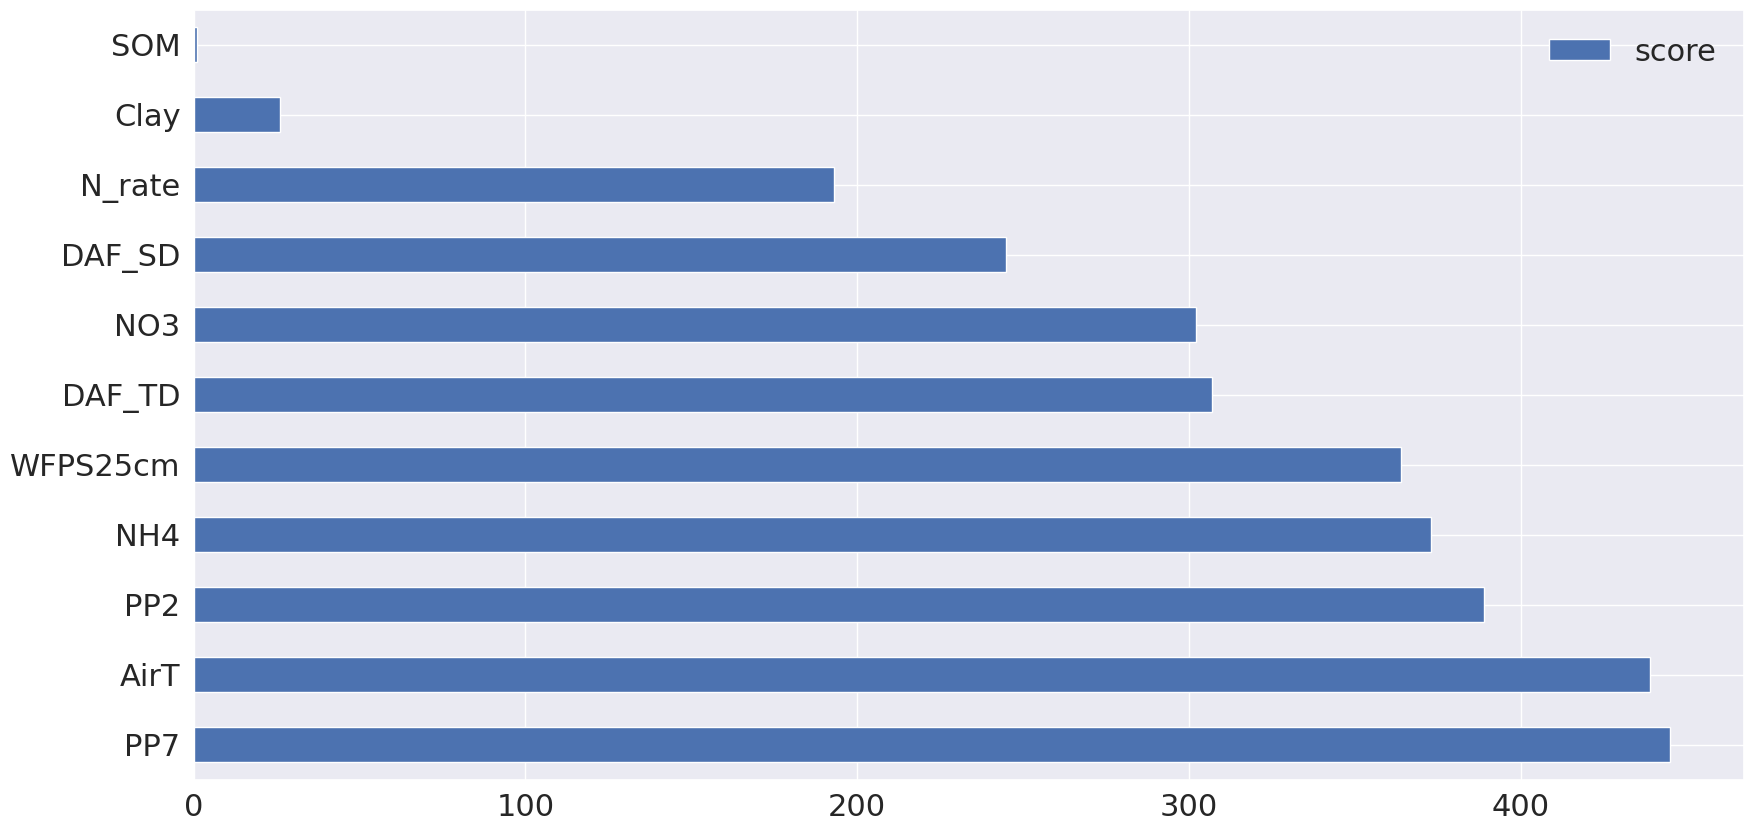

In [ ]:
boost = XGBRegressor()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
print("r2 score for base model: %f" % r2_score(y_test, y_pred))

feature_important = boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize = (20,10))

In [ ]:
feats = data.index[:10].to_list()
feats

['PP7',
 'AirT',
 'PP2',
 'NH4',
 'WFPS25cm',
 'DAF_TD',
 'NO3',
 'DAF_SD',
 'N_rate',
 'Clay']

In [ ]:
# hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from xgboost import XGBRegressor

# Define the model with default hyperparameters
boost = XGBRegressor()

# Define a reduced parameter grid
grid_params_xgb = [
    {
        'n_estimators': [100, 200],
        'max_depth': [9, 12],
        'min_child_weight': [7, 8],
        'subsample': [0.9, 1.0]
    }
]

# Select a subset of features for training and testing
X_train_sel = X_train[feats]
X_test_sel = X_test[feats]

# Set up cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)

# Perform GridSearchCV with reduced parameter grid
XGB = GridSearchCV(
    estimator=boost,
    param_grid=grid_params_xgb,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=10
)

# Fit the model
XGB.fit(X_train_sel, y_train)

# Get the best estimator and parameters
best_model = XGB.best_estimator_
best_params = XGB.best_params_

# Predict using the best model on the test set
pred = best_model.predict(X_test_sel)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print('Best MAE: %.3f' % XGB.best_score_) # model__max_depth=12, model__min_child_weight=8, model__subsample=1.0, n_estimators=200
boost_final = XGB.best_estimator_

Best MAE: 0.494


In [ ]:
y_hat = boost_final.predict(x_test_sel)
print(f'Training score : {XGB.score(X_train_sel,y_train)}')

# print()
print('r2 score:', r2_score(y_test, y_hat))
print('MAE:', mean_absolute_error(y_test, y_hat))
print('MSE:', mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat)))

Training score : 0.9990793161315619
r2 score: 0.4696198983434914
MAE: 6.050175482296646
MSE: 289.80103231999874
RMSE: 17.02354347132226


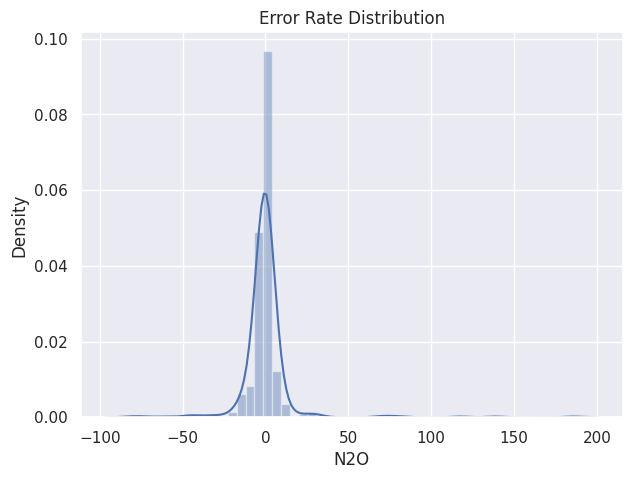

In [ ]:
plt.figure(figsize = (7,5))
sns.set()
sns.distplot(y_test - y_hat)
plt.title("Error Rate Distribution");

# **Conclusion**

The findings suggest that regression-based machine learning models such as XGBoost and Random Forest can improve temporal N2O flux projections from intensively managed cropping systems with minimum input data. Machine learning also makes it easier to analyse non-linear interactions between N2O predictor variables, which is difficult to do with traditional statistical methods. While our machine learning model predicted up to 90% variability in daily N2O fluxes from maize at two upper Midwest sites, it will take more model training based on a range of data sources from diverse soils, climate, crop, and management variables to apply it to other regions and crops. The findings also suggest two ways to improve the overall predictability of soil N2O emissions by integrating machine learning with process-based models —— potentially a new paradigm for N2O modelling.